In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('db/ex2data1.txt', names=['exam1','exam2','admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


0 red
1 blue


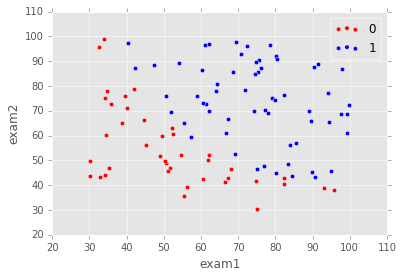

In [6]:
# data.plot(kind='scatter',x='exam1',y='exam2')
groups = data.groupby('admitted')
colors={'0':'red','1':'blue'}
fig,ax = plt.subplots()
for key,group in groups:
    print key, colors[str(key)]
    group.plot(ax=ax,kind='scatter',x='exam1',y='exam2',label=key,color=colors[str(key)])


## sigmoid function

0.990048198133 0.5 0.0099518018669


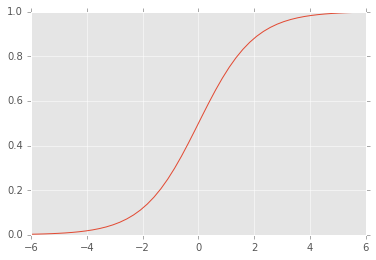

In [7]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

# hypothesis is squashed to [0,1]
x = np.linspace(-6,6)
plt.plot(x, sigmoid(x))
print sigmoid(4.6), sigmoid(0), sigmoid(-4.6)

## Cost function

In [22]:
def cost_function(theta, X, y):
    J = 0
    for i in range(len(X)):
        prediction = sigmoid(np.dot(theta,X[i]))
        J += (-y[i]*np.log(prediction)-(1-y[i])*np.log(1-prediction))
    J = J/(len(X))
    return J

X = data[['exam1', 'exam2']].values
X = np.column_stack((np.ones(len(X)),X))
print X[:5]
y = data['admitted'].values
theta = np.zeros(3)
print "cost:", cost_function(theta,X,y)

[[  1.          34.62365962  78.02469282]
 [  1.          30.28671077  43.89499752]
 [  1.          35.84740877  72.90219803]
 [  1.          60.18259939  86.3085521 ]
 [  1.          79.03273605  75.34437644]]
cost: 0.69314718056


## Minimize cost with optimizer

In [27]:
from scipy.optimize import fmin_bfgs, minimize
res = minimize(
    cost_function,
    theta,
    method='TNC',
    jac=False,
    args=(X, y),
    options={'gtol': 1e-3, 'disp': True, 'maxiter': 1000}
)
# print res
theta = res.x
cost = res.fun
# Print theta to screen
print 'Cost at theta found by scipy: %f' % cost
print 'theta:', ["%0.4f" % i for i in theta]

Cost at theta found by scipy: 0.203498
theta: ['-25.1828', '0.2064', '0.2016']


## Visualization

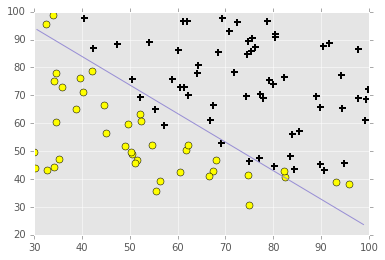

In [29]:
def plotData(X,y):
    pos = X[np.where(y==1,True,False).flatten()]
    neg = X[np.where(y==0,True,False).flatten()]
    plt.plot(pos[:,0], pos[:,1], '+', markersize=7, markeredgecolor='black', markeredgewidth=2)
    plt.plot(neg[:,0], neg[:,1], 'o', markersize=7, markeredgecolor='black', markerfacecolor='yellow')

    
def plotDecisionBoundary(theta, X, y):
    """
    Plots the data points X and y into a new figure with the decision boundary defined by theta
      PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the
      positive examples and o for the negative examples. X is assumed to be
      a either
      1) Mx3 matrix, where the first column is an all-ones column for the
         intercept.
      2) MxN, N>3 matrix, where the first column is all-ones
    """

    # Plot Data
    plt.figure()
    plotData(X[:,1:], y)

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([min(X[:, 2]),  max(X[:, 2])])

        # Calculate the decision boundary line
        plot_y = (-1./theta[2])*(theta[1]*plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y)

    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = [
                np.array([mapFeature2(u[i], v[j]).dot(theta) for i in range(len(u))])
                for j in range(len(v))
            ]
        plt.contour(u,v,z, levels=[0.0])

    # Legend, specific for the exercise
    # axis([30, 100, 30, 100])

plotDecisionBoundary(theta, X, y)


## Regularization

In [30]:
data = pd.read_csv('ex2data2.txt', names=['test1','test2','accepted'])
data.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


0 red
1 blue


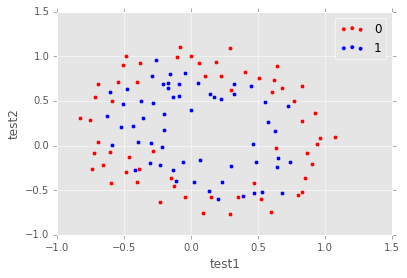

In [32]:
groups = data.groupby('accepted')
colors={'0':'red','1':'blue'}
fig,ax = plt.subplots()
for key,group in groups:
    print key, colors[str(key)]
    group.plot(ax=ax,kind='scatter',x='test1',y='test2',label=key,color=colors[str(key)])

In [50]:
def map_feature(X, degree=6):
    """
    Feature mapping function to polynomial features

    MAPFEATURE(X, degree) maps the two input features
    to quadratic features used in the regularization exercise.

    Returns a new feature array with more features, comprising of
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    """
    quads = pd.Series([X.iloc[0]**(i-j) * X.iloc[1]**j for i in range(1,degree+1) for j in range(i+1)])
    return pd.Series([1]).append([X,quads])

X = data[['test1','test2']]
y = data['accepted'].values
X = X.apply(map_feature, axis=1)
print X.head()
X=X.values

   0     test1    test2         0        1         2         3         4  \
0  1  0.051267  0.69956  0.051267  0.69956  0.002628  0.035864  0.489384   
1  1 -0.092742  0.68494 -0.092742  0.68494  0.008601 -0.063523  0.469143   
2  1 -0.213710  0.69225 -0.213710  0.69225  0.045672 -0.147941  0.479210   
3  1 -0.375000  0.50219 -0.375000  0.50219  0.140625 -0.188321  0.252195   
4  1 -0.513250  0.46564 -0.513250  0.46564  0.263426 -0.238990  0.216821   

          5         6    ...           17        18        19            20  \
0  0.000135  0.001839    ...     0.000900  0.012278  0.167542  1.815630e-08   
1 -0.000798  0.005891    ...     0.002764 -0.020412  0.150752  6.362953e-07   
2 -0.009761  0.031616    ...     0.015151 -0.049077  0.158970  9.526844e-05   
3 -0.052734  0.070620    ...     0.017810 -0.023851  0.031940  2.780914e-03   
4 -0.135203  0.122661    ...     0.026596 -0.024128  0.021890  1.827990e-02   

             21        22        23        24        25        26  


In [52]:
def cost_function_reg(theta, X, y, Lambda):
    J = 0
    for i in range(len(X)):
        prediction = sigmoid(np.dot(theta,X[i]))
        J += (-y[i]*np.log(prediction)-(1-y[i])*np.log(1-prediction))
    J = J/(len(X)) + (Lambda/(2*len(X)))*np.dot(theta[1:],theta[1:])
    return J

initial_theta = np.zeros(X.shape[1])
Lambda = 0.0
cost_function_reg(initial_theta, X, y, Lambda)

0.69314718055994606